In [8]:
%matplotlib inline
%matplotlib notebook
from copy import deepcopy
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
# rc('text', usetex=True)
import seaborn as sns
import numpy as np
import tensorboard
import os
import sys
from IPython.display import HTML
# %load_ext tensorboard

exp_dir_root = "/home/ekumar/master_thesis/results/training/december/iqn/"

sns.set_theme(style="whitegrid")
sns.set_style("ticks")
sns.color_palette("Set2")

plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.rcParams['font.family'] = "serif"
sns.set(font_scale=2)
sns.set_style("ticks")


def load_from_dir(exp_dir):
    return os.path.join(exp_dir_root, exp_dir)

def load_benchmark_data(exp_dir):
    return pd.read_pickle(os.path.join(load_from_dir(exp_dir), "value_dist/data_1_light_dense_12_16"))

In [9]:
value_dist = load_benchmark_data("exp_iqn_lbnw")


#last 13 steps of exp_iqn_lbnw is 1 scenario
value_dist = value_dist.tail(13).reset_index()
value_dist.reset_index()
# value_dist.drop('index')
print(value_dist)

    index         0         1         2         3         4         5  \
0       0  0.738402  0.711724  0.697451  0.695820  0.774391  0.766668   
1       1  0.693995  0.620312  0.670709  0.667534  0.776134  0.712594   
2       2  0.703664  0.630527  0.703513  0.707113  0.781198  0.696404   
3       3  0.685343  0.615709  0.706389  0.714378  0.765573  0.658847   
4       4  0.791007  0.767231  0.804537  0.799798  0.798805  0.759953   
5       5  0.799964  0.793742  0.818811  0.805153  0.806297  0.760035   
6       6  0.800112  0.809556  0.823148  0.803205  0.807395  0.758006   
7       7  0.785932  0.802869  0.819182  0.788003  0.800609  0.732275   
8       8  0.871287  0.870951  0.885667  0.851931  0.854612  0.862281   
9       9  0.907325  0.916623  0.912708  0.875134  0.887780  0.890387   
10     10  0.877383  0.896475  0.893124  0.853185  0.869747  0.871439   
11     11  0.857845  0.880168  0.877651  0.840610  0.853955  0.857119   

           6         7  
0   0.574905  0.665294  


0    0.738402
1    0.711724
2    0.697451
3    0.695820
4    0.774391
5    0.766668
6    0.574905
7    0.665294
Name: 0, dtype: float64


<IPython.core.display.Javascript object>


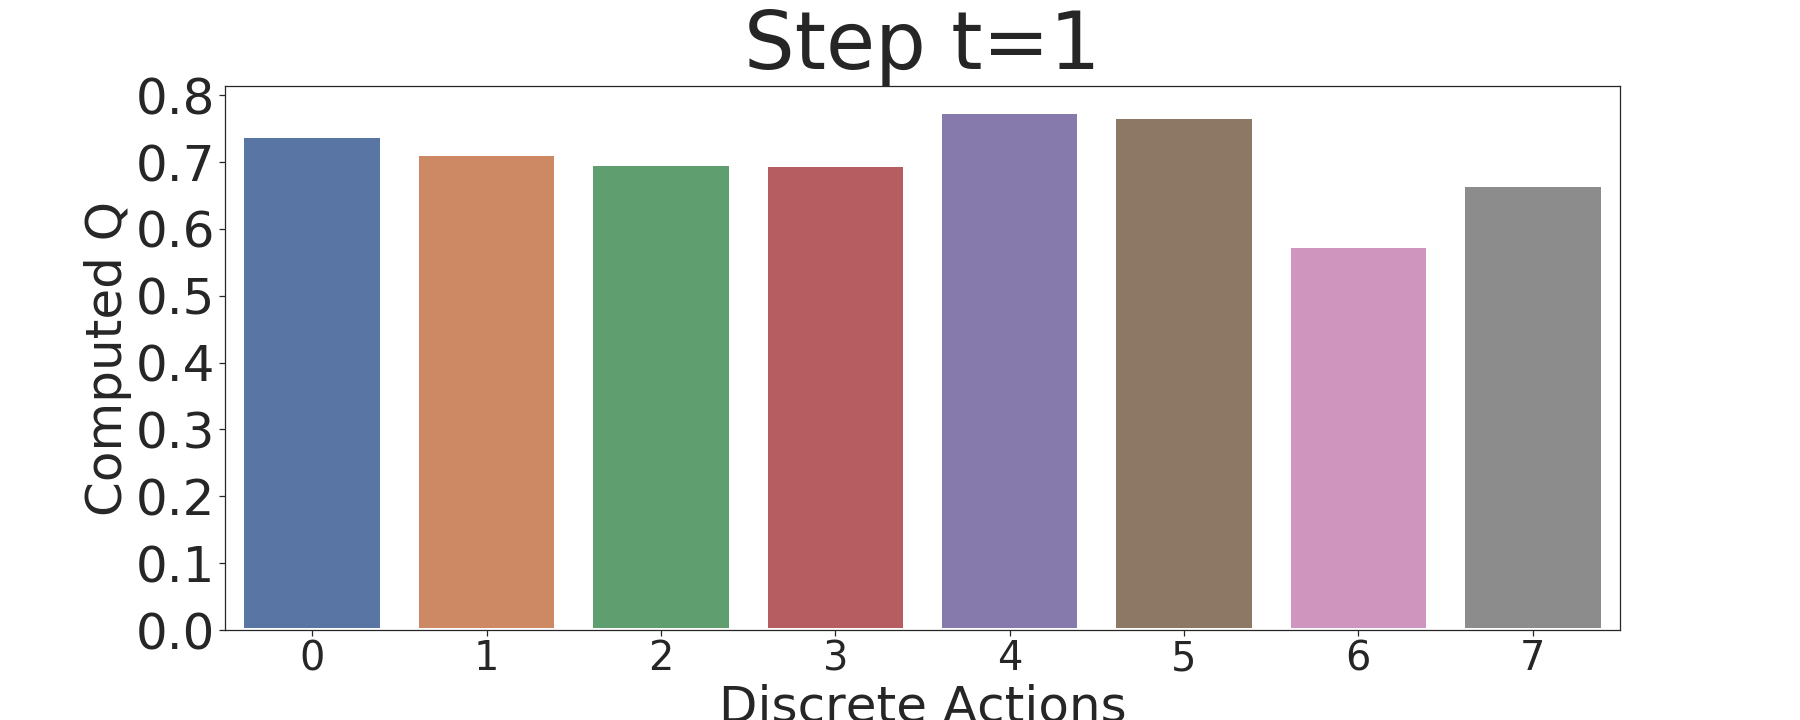

<IPython.core.display.Javascript object>


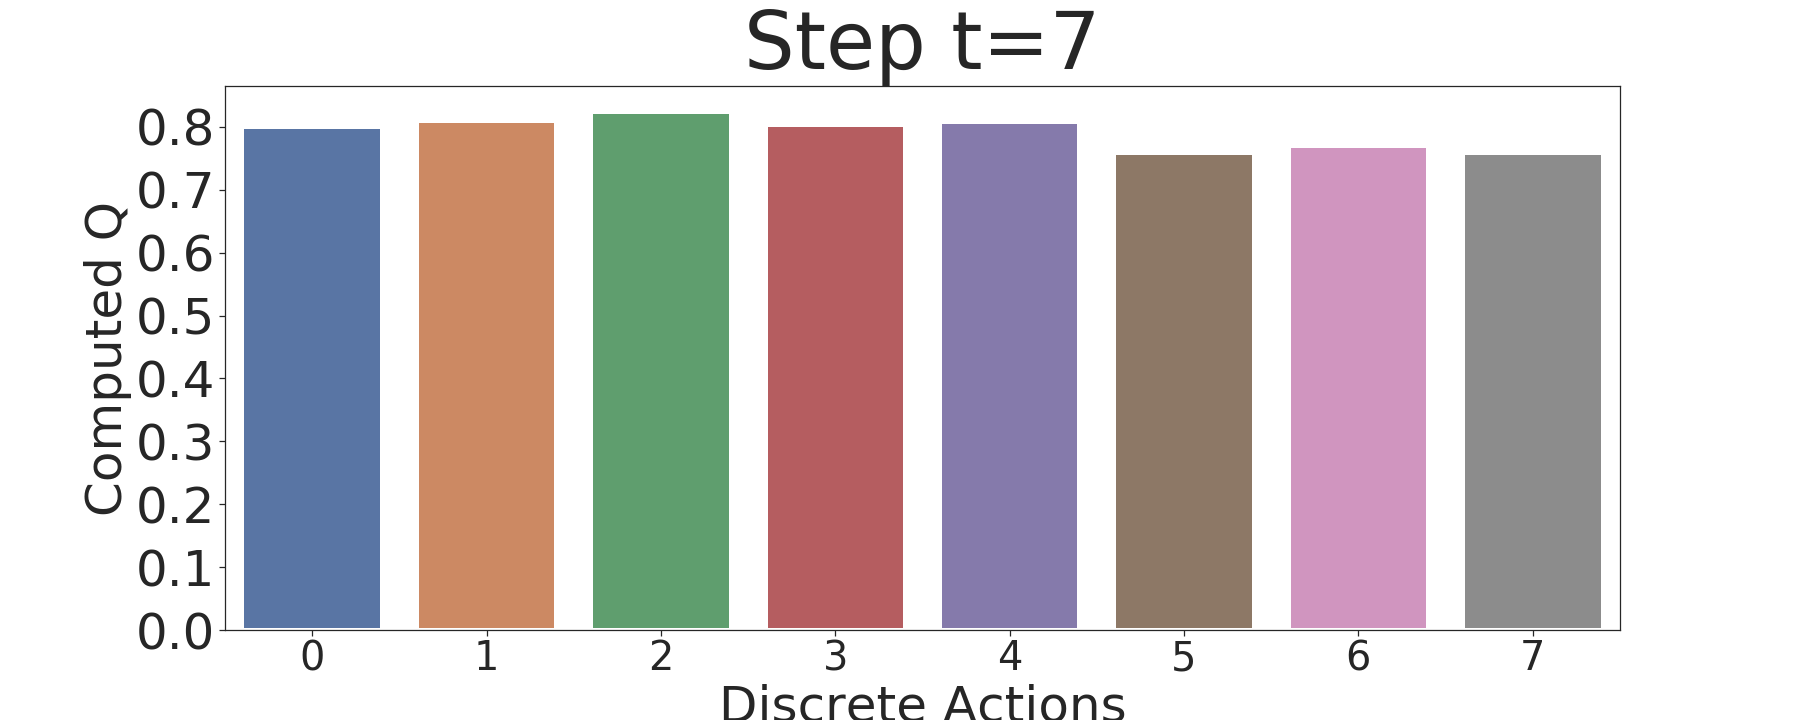

<IPython.core.display.Javascript object>


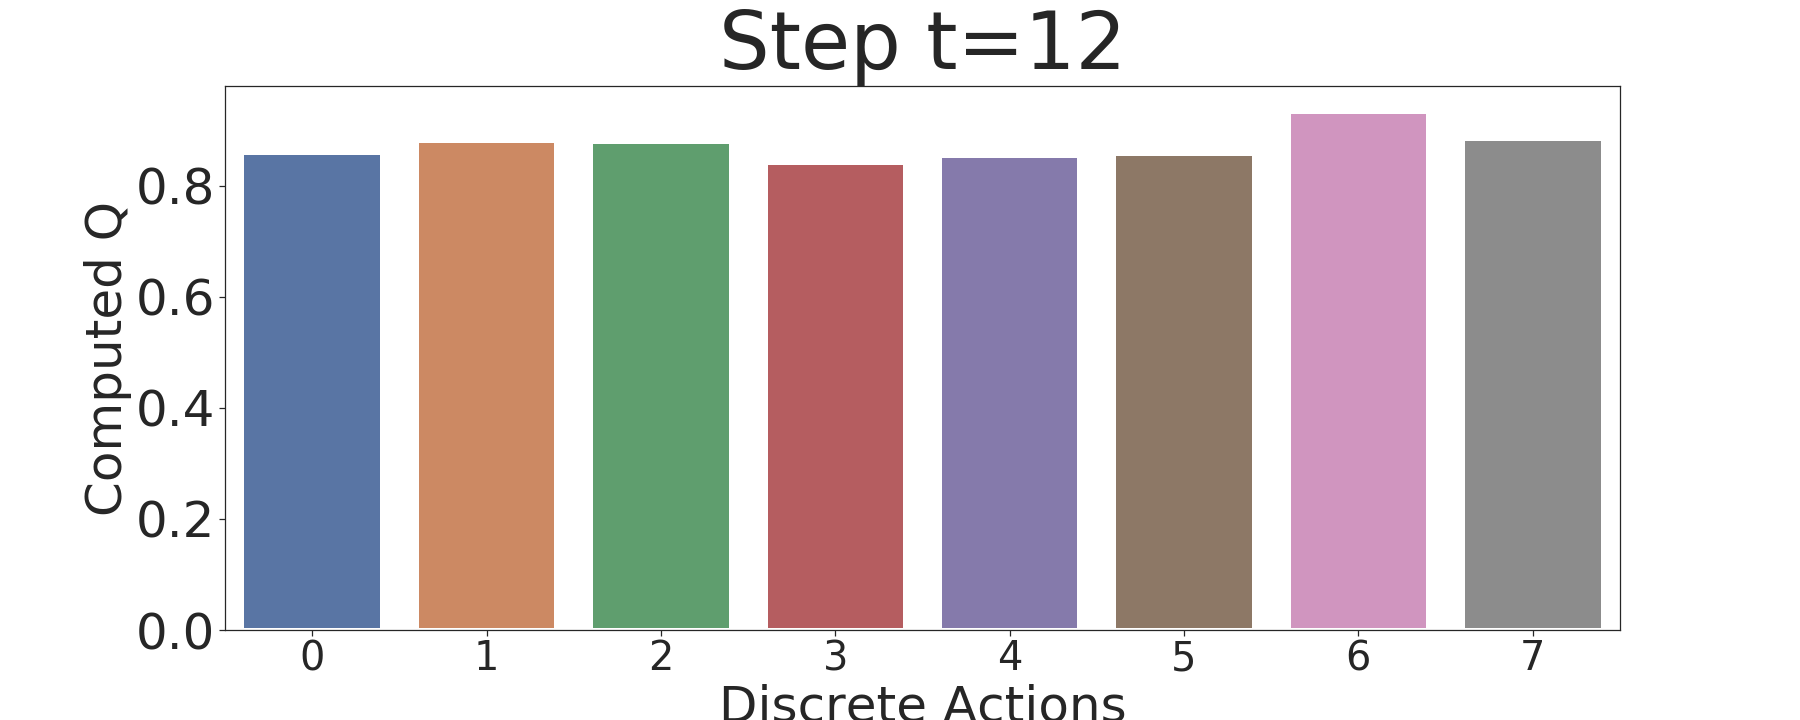

<IPython.core.display.Javascript object>


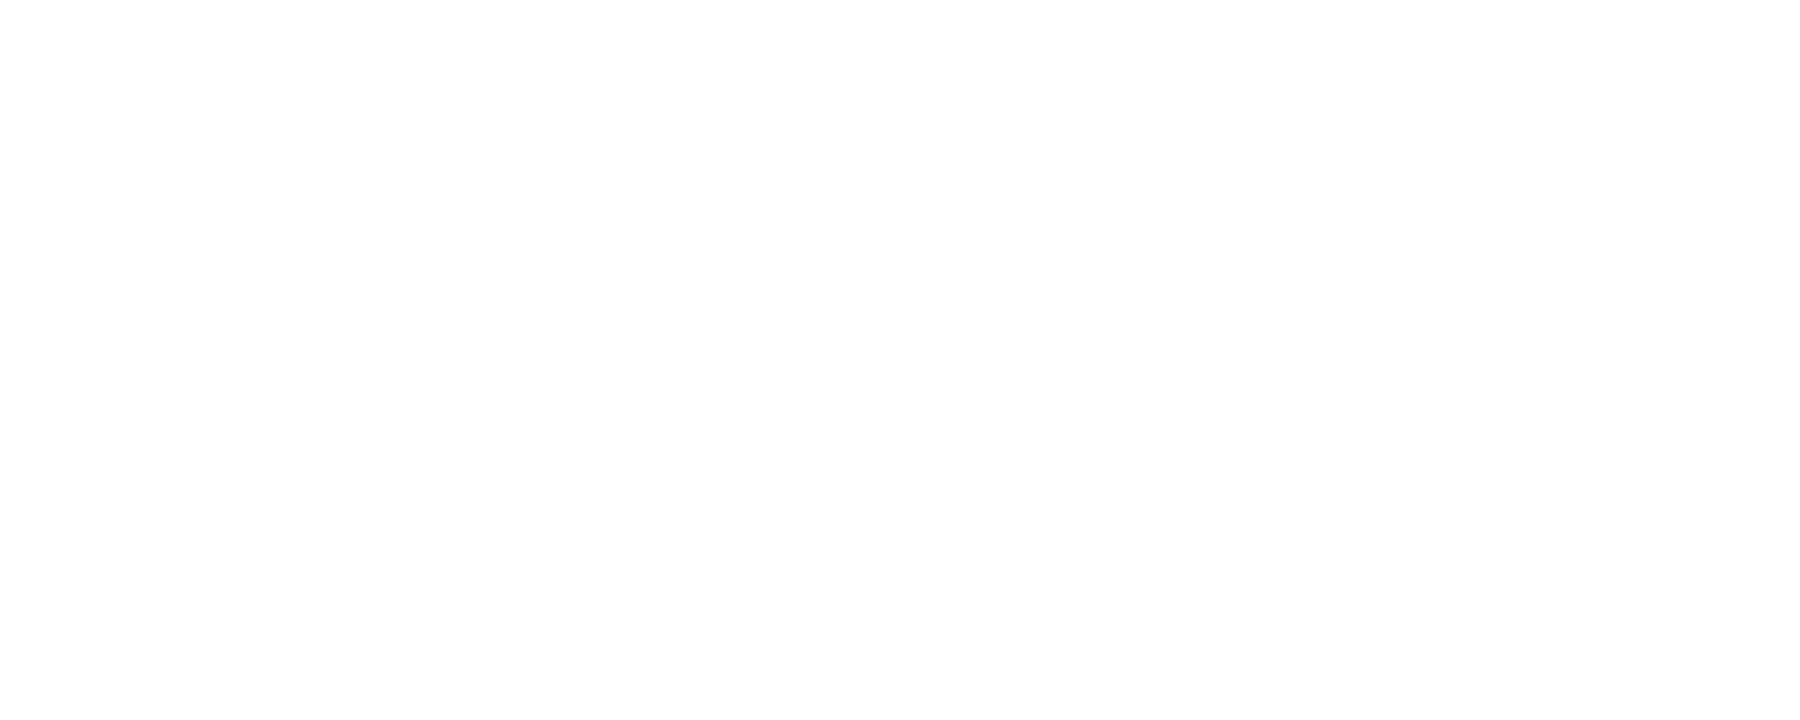

<IPython.core.display.Javascript object>


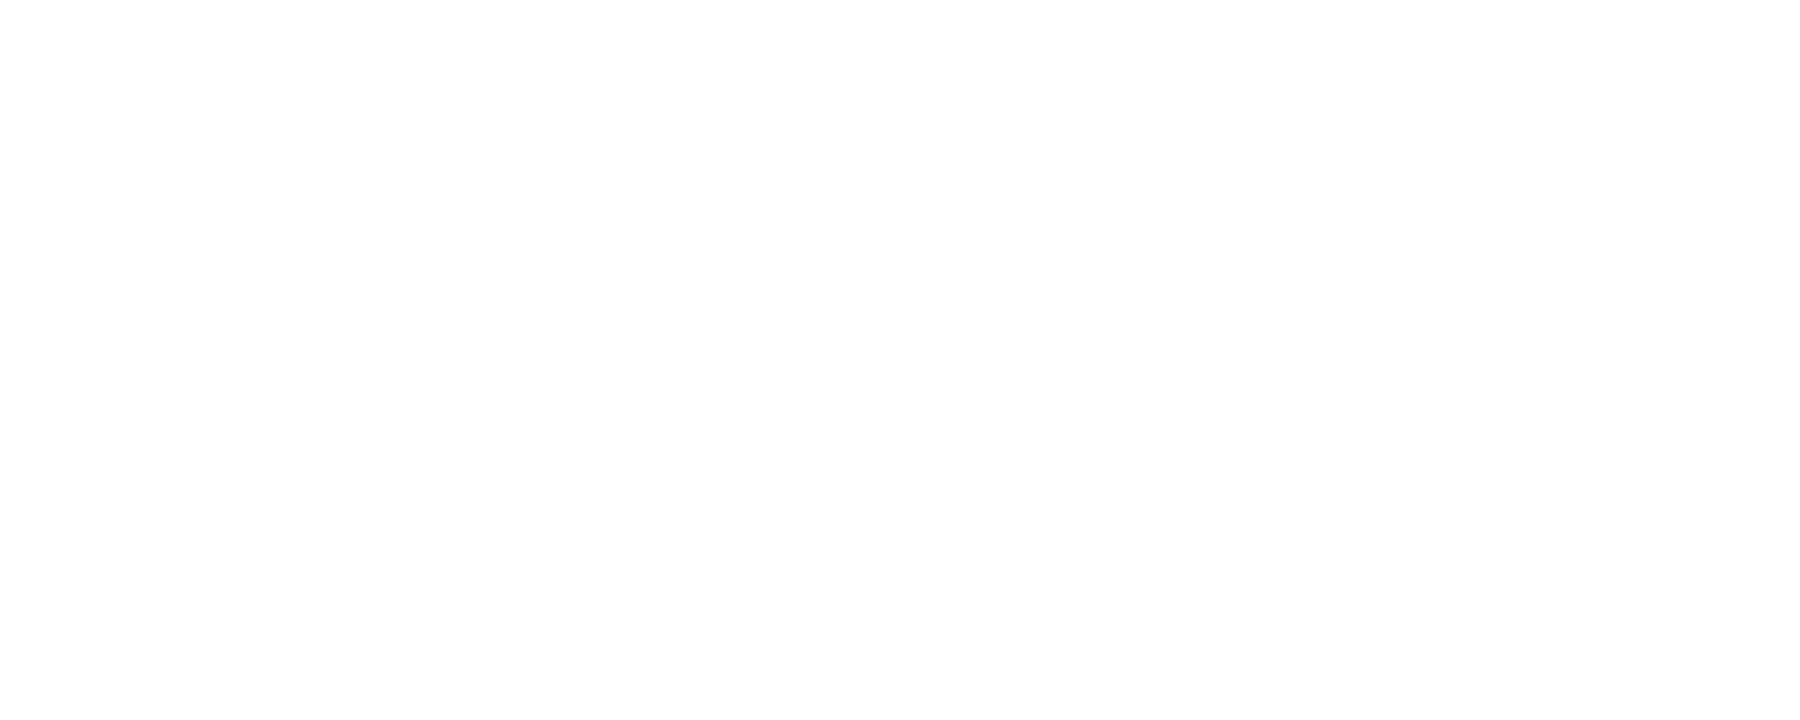

In [17]:
num_rows = value_dist.shape[0]

x = np.arange(0, 8)
# x_new = np.linspace(0, 7, 1000)
# print(x, x_new)
# for i in range(0, 13):
#     y = value_dist.iloc[i][1:]
# #     print(y)
#     a_BSpline = interpolate.make_interp_spline(x, y)
#     sns.lineplot(x=x_new, y =a_BSpline(x_new), color='maroon', linewidth=4)
# #     sns.lineplot(x=x, y =y)
#     plt.ylabel('Discrete Actions', fontsize=16)
#     plt.xlabel('Computed Q', fontsize=16)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)
#     plt.figure()
    
y = value_dist.iloc[0][1:]
print(y)
a_BSpline = interpolate.make_interp_spline(x, y)
sns.barplot(x=x, y =y, linewidth=4)
#     sns.lineplot(x=x, y =y)
plt.title('Step t=1', fontsize=80)
plt.xlabel('Discrete Actions', fontsize=50)
plt.ylabel('Computed Q', fontsize=50)
# plt.legend(fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=50)
plt.savefig('t1_iqn_q.pdf')
plt.figure()

y = value_dist.iloc[6][1:]
#     print(y)
a_BSpline = interpolate.make_interp_spline(x, y)
sns.barplot(x=x, y =y, linewidth=4)#     sns.lineplot(x=x, y =y)
plt.title('Step t=7', fontsize=80)
plt.xlabel('Discrete Actions', fontsize=50)
plt.ylabel('Computed Q', fontsize=50)
# plt.legend(fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=50)
plt.savefig('t7_iqn_q.pdf')
plt.figure()

y = value_dist.iloc[11][1:]
#     print(y)
a_BSpline = interpolate.make_interp_spline(x, y)
sns.barplot(x=x, y =y, linewidth=4)#     sns.lineplot(x=x, y =y)
plt.title('Step t=12', fontsize=80)
plt.xlabel('Discrete Actions', fontsize=50)
plt.ylabel('Computed Q', fontsize=50)
# plt.legend(fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=50)
plt.savefig('t12_iqn_q.pdf')
plt.figure()

In [ ]:
import pickle
from mpl_toolkits import mplot3d

pkl_file = open(os.path.join(load_from_dir("exp_iqn_lbnw"), "quantiles/data_1_light_dense_12_16"), 'rb')

data1 = pickle.load(pkl_file)
# pprint.pprint(data1)
print(data1.shape)

pkl_file.close()

# data2 taus
pkl_file = open(os.path.join(load_from_dir("exp_iqn_lbnw"), "sampled_taus/data_1_light_dense_12_16"), 'rb')
data2 = pickle.load(pkl_file)
print(data2.shape)

pkl_file.close()

sample_idx = [1, 6, 11]
sample_idx_steps = [1, 7, 12]

# print(data2[sample_idx])
# print(data2[1])
idx_bef = data2.argsort(axis=1)
print(idx_bef.shape)
# data2.sort(axis=1)
# print(data2[sample_idx])
# print(data2[1])

data2.sort(axis=1)
# print(data2[sample_idx])
x = data2[sample_idx]
# print("x", x)
# x_new = np.linspace(0.0, 1.0, 100)
# print(x_new)
# print(data1[][idx_bef, 2])
df = []
for idx, txt in zip(sample_idx, sample_idx_steps):
    plt.figure()
#     print(idx)
    for i in range(0, 8):
#         df.append((i, data1[idx][idx_bef[idx], i]))

        y = data1[idx][idx_bef[idx], i]
#         print(y, x[idx])
    #     print(a_BSpline(x_new))
    #     y_new = a_BSpline(x_new)
    #     print("Y NEW", y_new, x_new)
    #     sns.lineplot(x=x, y=y, linewidth=2, label=f"Inverse CDF of Action $A_{i}$", marker="o")
    #     plt.figure()
        sns.lineplot(x=y, y=data2[idx], linewidth=2, label=f"Approximated CDF of Action $A_{i}$", marker="x")
    #     plt.figure()
    #     sns.lineplot(x=y_new, y=x_new, linewidth=2, label=f"CDF of Action $A_{i}$")#, marker="o")
    #     plt.figure()
    #     sns.lineplot(x=x_new, y=y_new, linewidth=2, label=f"Inverse CDF of Action $A_{i}$", marker="o")
    #     sns.lineplot(x=y, y=x, linewidth=2, label=f"CDF of Action $A_{i}$", marker="o")
        plt.title(f'Step t={txt}', fontsize=30)
        plt.xlabel(r"$quantile(\tau)$", fontsize=30)
        plt.ylabel(r"${\tau}$", fontsize=30)
        plt.legend(fontsize=25)
        plt.xticks(fontsize=30)
        plt.yticks(fontsize=30)
        plt.savefig(f't{txt}_iqn_cdf.svg')
#         dx = np.diff(x[idx])
#         dy = np.diff(y)/
#         slopes = dy/dx
#         print(slopes)
#         plt.figure()
#         sns.lineplot(x=dy, y=slopes, linewidth=2, label=f"Underling Distribution Z", marker="o")
    #     taus = np.diff(x) / np.diff(y)
    #     print(taus, densities)
    #     plt.figure()
    #     sns.kdeplot(y=dx/dy, x=dy, linewidth=2, label=f"CDF of Action $A_{i}$", marker="o")
#         break
#     break

df = pd.DataFrame(df, columns=['action_idx', 'cdf'])
# print(df)

In [ ]:
import pprint, pickle
from mpl_toolkits import mplot3d

pkl_file = open(os.path.join(load_from_dir("exp_iqn_lbnw"), "quantiles/data_1_light_dense_12_16"), 'rb')

data1 = pickle.load(pkl_file)
# pprint.pprint(data1)
print(data1.shape)

pkl_file.close()

X2, Y2 = np.meshgrid(range(data1.shape[1]), range(data1.shape[2]))


Z2 = data1[-3][X2, Y2]
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X=X2, Y=Y2, Z=Z2, cmap='twilight_shifted')
# surf._facecolors2d = surf._facecolors3d
# surf._edgecolors2d = surf._edgecolors3d
# ax.legend()
plt.ylabel('Discrete Actions (A)', fontsize=30, labelpad=30)
plt.xlabel(r'Sampled fractions ($\tau$)', fontsize=30, labelpad=30)
ax.set_zlabel('Sampled Quantiles (Z)', fontsize=30, labelpad=30)
plt.title('Quantiles Step t=10', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# ax.xaxis.labelpad = 20
# ax.yaxis.labelpad = 20
# ax.tick_params(axis='both', which='major', pad=130)
ax.zaxis.set_tick_params(labelsize=30)
plt.savefig('t10_iqn_quantiles.svg')
plt.figure()

Z2 = data1[-2][X2, Y2]
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X=X2, Y=Y2, Z=Z2, cmap='twilight_shifted')
# surf._facecolors2d = surf._facecolors3d
# surf._edgecolors2d = surf._edgecolors3d
# ax.legend()
plt.ylabel('Discrete Actions (A)', fontsize=30, labelpad=30)
plt.xlabel(r'Sampled fractions ($\tau$)', fontsize=30, labelpad=30)
ax.set_zlabel('Sampled Quantiles (Z)', fontsize=30, labelpad=30)
plt.title('Quantiles Step t=11', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# ax.xaxis.labelpad = 20
# ax.yaxis.labelpad = 20
# ax.tick_params(axis='both', which='major', pad=130)
ax.zaxis.set_tick_params(labelsize=30)
plt.savefig('t11_iqn_quantiles.svg')
plt.figure()

Z2 = data1[-1][X2, Y2]
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X=X2, Y=Y2, Z=Z2, cmap='twilight_shifted')
# surf._facecolors2d = surf._facecolors3d
# surf._edgecolors2d = surf._edgecolors3d
# ax.legend()
plt.ylabel('Discrete Actions (A)', fontsize=30, labelpad=30)
plt.xlabel(r'Sampled fractions ($\tau$)', fontsize=30, labelpad=30)
ax.set_zlabel('Sampled Quantiles (Z)', fontsize=30, labelpad=30)
plt.title('Quantiles Step t=12', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# ax.xaxis.labelpad = 20
# ax.yaxis.labelpad = 20
# ax.tick_params(axis='both', which='major', pad=130)
ax.zaxis.set_tick_params(labelsize=30)
plt.savefig('t12_iqn_quantiles.svg')
plt.figure()

In [ ]:
# sns.lineplot(x="x", y=value_dist[1], data=value_dist, legend="full")
value_dist["x"] = value_dist.index
def plot_q_values(i):
    sns.lineplot(x="x", y=value_dist[i], data=value_dist, legend="full")
    plt.xlabel("Steps")
    plt.ylabel(f"Action {i}")
    plt.figure()
    
for i in range(0, 8):
    plot_q_values(i)
